In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import PIL   #image library in python
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir= "",  untar=True) #cache_dir : you want to save dataset

In [ ]:
data_dir

'/tmp/.keras/datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/tmp/.keras/datasets/flower_photos')

In [ ]:
len(list(data_dir.glob('*/*.jpg')))   #glob: give me all images which has extension jpg
#this number of dataset

3670

In [ ]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/roses/4061451210_1650590c6a.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/8642943283_47e44d049d_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/16149016979_23ef42b642_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/19988406792_68201f76e3_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/410425647_4586667858.jpg')]

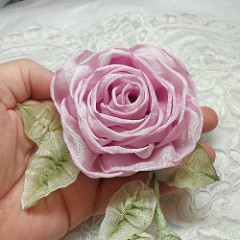

In [ ]:
PIL.Image.open(str(roses[1]))

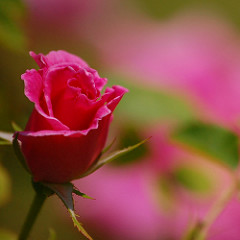

In [ ]:
PIL.Image.open(str(roses[10]))

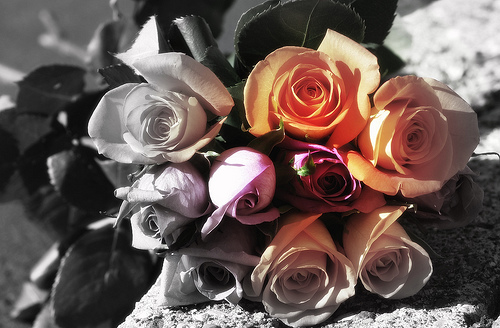

In [ ]:
PIL.Image.open(str(roses[66]))

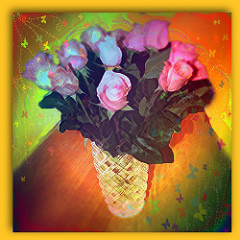

In [ ]:
PIL.Image.open(str(roses[90]))

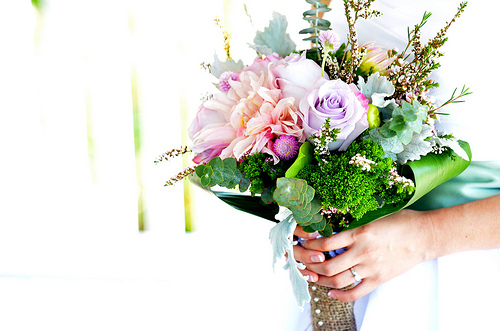

In [ ]:
PIL.Image.open(str(roses[9]))

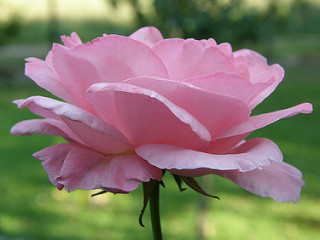

In [ ]:
PIL.Image.open(str(roses[199]))

In [ ]:
tulips = list(data_dir.glob('tulips/*.jpg'))
tulips[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/tulips/4042180234_64cd2859c9_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/tulips/137126311_debe64c6a8_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/tulips/5632006303_15acd2cf1e_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/tulips/8677713853_1312f65e71.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/tulips/8454719295_4276c0e9c5_n.jpg')]

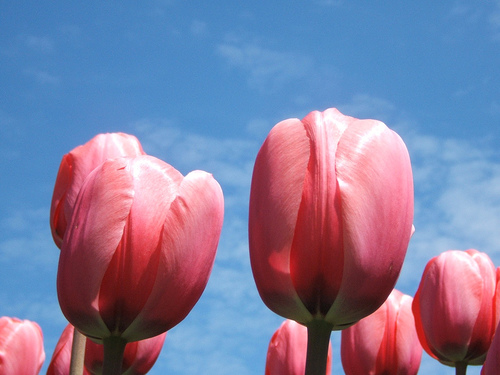

In [ ]:
PIL.Image.open(str(tulips[5]))

In [ ]:
dandelion = list(data_dir.glob('dandelion/*.jpg'))
dandelion[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/6985099958_5249a4688b.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/7062171343_db61c92737_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/8689302980_9bd2f7b9fe_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/2502610598_b9f1b55ebd_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/8083321316_f62ea76f72_n.jpg')]

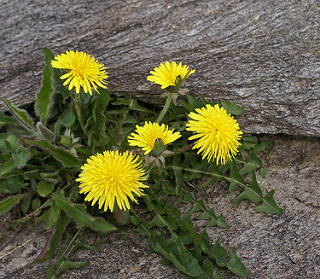

In [ ]:
PIL.Image.open(str(dandelion[10]))

In [ ]:
#dictionary of different flowers and all images paths associated with it
flowers_images_dict = {
    'roses': list(data_dir.glob('tulips/*.jpg')),
    'tulips': list(data_dir.glob('tulips/*.jpg')),
    'dandelion': list(data_dir.glob('dandelion/*.jpg')),
    'sunflowers': list(data_dir.glob('sunflowers/*.jpg')),
    'daisy': list(data_dir.glob('daisy/*.jpg')),


}

In [ ]:
flowers_labels = {
    'roses': 0,
    'tulips':1,
    'dandelion':2,
    'sunflowers':3,
    'daisy':4
}

In [ ]:
str(flowers_images_dict['roses'][0])

'/tmp/.keras/datasets/flower_photos/tulips/4042180234_64cd2859c9_m.jpg'

array([[[ 96, 106,  90],
        [118, 126, 109],
        [ 90,  98,  81],
        ...,
        [  5,  12,   0],
        [  5,  12,   0],
        [  8,  15,   0]],

       [[103, 110,  95],
        [104, 112,  95],
        [ 97, 103,  86],
        ...,
        [  4,  11,   0],
        [  6,  13,   0],
        [  7,  14,   0]],

       [[115, 122, 107],
        [104, 112,  95],
        [117, 123, 106],
        ...,
        [  6,  13,   0],
        [  8,  15,   0],
        [  6,  13,   0]],

       ...,

       [[  5,  12,   0],
        [  3,  39,  15],
        [ 16,  41,  15],
        ...,
        [ 11,  21,   5],
        [ 14,  24,   8],
        [ 17,  28,  12]],

       [[ 12,  20,   3],
        [  1,  27,   3],
        [  6,  29,   1],
        ...,
        [  4,  16,   0],
        [  7,  21,   0],
        [ 10,  27,   0]],

       [[ 11,  19,   2],
        [  0,  26,   2],
        [  6,  29,   1],
        ...,
        [  6,  18,   0],
        [ 10,  24,   0],
        [ 13,  30,   3]]], dtype=uint8)
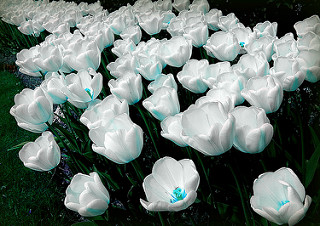

In [ ]:
#we will use cve2 to read this files(images)
img =  cv2.imread(str(flowers_images_dict['roses'][30]))
img

In [ ]:
x, y = [], []
for flower_name, images in flowers_images_dict.items():
  print(flower_name)
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (180,180))
    x.append(resized_img)
    y.append(flowers_labels[flower_name])

roses
tulips
dandelion
sunflowers
daisy


array([[[ 84,  84,  99],
        [ 87,  87, 101],
        [ 87,  89, 100],
        ...,
        [ 87,  90,  88],
        [ 89,  89,  89],
        [ 91,  89,  89]],

       [[  7,   0,  43],
        [  6,   0,  42],
        [  6,   0,  41],
        ...,
        [  4,  13,  10],
        [  2,  10,   6],
        [  0,   7,   4]],

       [[  3,   2,  42],
        [  2,   0,  41],
        [  3,   0,  41],
        ...,
        [  4,  23,  15],
        [  2,  19,  11],
        [  0,  15,   8]],

       ...,

       [[ 13,  61,  20],
        [ 12,  59,  19],
        [  6,  54,  14],
        ...,
        [ 20,  60,  21],
        [ 17,  62,  22],
        [ 16,  63,  23]],

       [[  8,  51,   8],
        [ 10,  53,  11],
        [  6,  47,   6],
        ...,
        [ 28,  62,  27],
        [ 24,  61,  27],
        [ 23,  61,  28]],

       [[ 84,  99,  87],
        [ 90, 103,  93],
        [ 89,  99,  91],
        ...,
        [ 87, 115,  89],
        [ 84, 113,  87],
        [ 83, 112,  86]]], dtype=uint8)
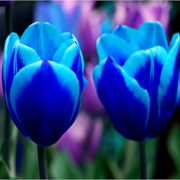

In [ ]:
x[0]    #it's an array with 3 dimensional first for x and second for y and third for rgb

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [ ]:
len(x_train)

3062

In [ ]:
len(y_train)

3062

In [ ]:
len(x_test)

766

In [ ]:
len(y_test)

766

In [ ]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

# ***Model Buliding***

In [ ]:
num_classes = 5
model = Sequential([
    layers.Conv2D(16, 3, padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),



])

model.compile(optimizer= 'adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ['accuracy'])

In [ ]:
model.fit(x_train_scaled, y_train, epochs= 70)

Epoch 1/70
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6278 - loss: 1.2772
Epoch 2/70
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6498 - loss: 1.1407
Epoch 3/70
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6489 - loss: 1.0878
Epoch 4/70
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6462 - loss: 1.1387
Epoch 5/70
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6562 - loss: 1.0815
Epoch 6/70
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6543 - loss: 1.0804
Epoch 7/70
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6385 - loss: 1.0778
Epoch 8/70
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6437 - loss: 1.1343
Epoch 9/70
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6445 - loss: 1.1147
Epoch 10/70
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6675 - loss: 1.0237
Epoch 11/70
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6476 - loss: 1.1101
Epoch 12/70
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy:

In [ ]:
model.evaluate(x_test_scaled, y_test )

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.0029 - loss: 4.8300


[4.826836109161377, 0.0013054830487817526]

In [ ]:
predictions = model.predict(x_test_scaled)
predictions

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[0.0000000e+00, 1.3631304e-01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.2496323e-01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 5.2498423e-02],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 6.5350533e-04,
        0.0000000e+00, 8.5031189e-02],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 5.7950232e-02],
       [0.0000000e+00, 2.5116932e-01, 0.0000000e+00, ..., 2.4761492e-02,
        5.3991936e-02, 0.0000000e+00],
       [2.1043769e-04, 6.9756374e-02, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([0.00690165, 0.00790957, 0.00690165, 0.00944093, 0.00897327,
       0.01134045, 0.00690165, 0.00690165, 0.00743902, 0.00845884,
       0.00702606, 0.00906646, 0.00690165, 0.0125471 , 0.00690165,
       0.00690165, 0.00690165, 0.00690165, 0.00976455, 0.00690165,
       0.01132502, 0.00690165, 0.00811581, 0.006963  , 0.00795466,
       0.00780368, 0.00690165, 0.00690165, 0.00956799, 0.00929089,
       0.0083007 , 0.00690165, 0.00690165, 0.00830745, 0.00982141,
       0.00836128, 0.00701709, 0.00690165, 0.00856838, 0.00690165,
       0.00690165, 0.00690165, 0.00690165, 0.01082351, 0.00690165,
       0.00888153, 0.00690165, 0.00690165, 0.00690165, 0.00864536,
       0.00690165, 0.00808123, 0.00690165, 0.00690165, 0.00690165,
       0.00812436, 0.00980274, 0.00778742, 0.00690165, 0.00690165,
       0.00690165, 0.00970565, 0.01191739, 0.00906804, 0.01141221,
       0.00880865, 0.00690165, 0.00690165, 0.00788157, 0.00978452,
       0.00690

In [ ]:
np.argmax(score)

In [ ]:
y_test[0]

In [ ]:
plt.axis('off')
plt.imshow(x[0])
plt.show()

In [ ]:
# prompt: create data_augentataion

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate images randomly by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Shift images vertically by up to 20% of the height
    shear_range=0.2,  # Apply shear transformation
    zoom_range=0.2,  # Zoom in or out by up to 20%
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels after transformations
)

# Apply data augmentation to your training data
augmented_data = datagen.flow(x_train_scaled, y_train, batch_size=32)

# Use the augmented data for training your model
model.fit(augmented_data, epochs=17)

Epoch 1/17


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - accuracy: 0.4716 - loss: 1.9552
Epoch 2/17
96/96 ━━━━━━━━━━━━━━━━━━━━ 42s 215ms/step - accuracy: 0.5077 - loss: 1.7598
Epoch 3/17
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 0.5124 - loss: 1.6831
Epoch 4/17
96/96 ━━━━━━━━━━━━━━━━━━━━ 42s 218ms/step - accuracy: 0.5379 - loss: 1.6408
Epoch 5/17
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 204ms/step - accuracy: 0.5372 - loss: 1.6217
Epoch 6/17
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 218ms/step - accuracy: 0.5361 - loss: 1.6023
Epoch 7/17
96/96 ━━━━━━━━━━━━━━━━━━━━ 40s 205ms/step - accuracy: 0.5408 - loss: 1.6397
Epoch 8/17
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 214ms/step - accuracy: 0.5398 - loss: 1.5291
Epoch 9/17
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 205ms/step - accuracy: 0.5267 - loss: 1.6804
Epoch 10/17
96/96 ━━━━━━━━━━━━━━━━━━━━ 40s 201ms/step - accuracy: 0.5466 - loss: 1.5418
Epoch 11/17
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 204ms/step - accuracy: 0.5583 - loss: 1.5279
Epoch 12/17
96/96 ━━━━━━━━━━━━━━━━━━━━ 40s 203ms/ste